# TCGA correlation of WNT and MYC signaling with Immune signaling


Script related to figure s3g

### Aim:
- Correlate TCGA MYC and WNT siganling with immune signaling

In [2]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau, spearmanr

In [4]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

In [8]:
file_nes = home + 'Data/3/HallmarksStromaImmune_NES_TCGAOV.txt'

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [9]:
data_nes.index

Index(['HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_HYPOXIA',
       'HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'HALLMARK_MITOTIC_SPINDLE',
       'HALLMARK_WNT_BETA_CATENIN_SIGNALING', 'HALLMARK_TGF_BETA_SIGNALING',
       'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_DNA_REPAIR',
       'HALLMARK_G2M_CHECKPOINT', 'HALLMARK_APOPTOSIS',
       'HALLMARK_NOTCH_SIGNALING', 'HALLMARK_ADIPOGENESIS',
       'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_ESTROGEN_RESPONSE_LATE',
       'HALLMARK_ANDROGEN_RESPONSE', 'HALLMARK_MYOGENESIS',
       'HALLMARK_PROTEIN_SECRETION', 'HALLMARK_INTERFERON_ALPHA_RESPONSE',
       'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_APICAL_JUNCTION',
       'HALLMARK_APICAL_SURFACE', 'HALLMARK_HEDGEHOG_SIGNALING',
       'HALLMARK_COMPLEMENT', 'HALLMARK_UNFOLDED_PROTEIN_RESPONSE',
       'HALLMARK_PI3K_AKT_MTOR_SIGNALING', 'HALLMARK_MTORC1_SIGNALING',
       'HALLMARK_E2F_TARGETS', 'HALLMARK_MYC_TARGETS_V1',
       'HALLMARK_MYC_TARGETS_V2', 'HALLMARK_EPITHELIAL_MES

In [10]:
data_nes_t = data_nes.T

In [11]:
wnt = "HALLMARK_WNT_BETA_CATENIN_SIGNALING"
myc1 = "HALLMARK_MYC_TARGETS_V1"
myc2 = "HALLMARK_MYC_TARGETS_V2"
sper = "HALLMARK_SPERMATOGENESIS"
per = "HALLMARK_PEROXISOME"
psec = "HALLMARK_PROTEIN_SECRETION"
g2m = "HALLMARK_G2M_CHECKPOINT"
e2f = "HALLMARK_E2F_TARGETS"
y = "ImmuneSignature"

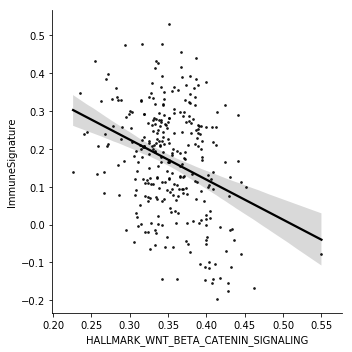

In [18]:
g = sns.lmplot(x=wnt,
               y=y,
               data=data_nes_t,
               truncate=True,
               scatter_kws={'color':'k',
                            'marker':".",
                            's':3},
               line_kws={'color':'k',
                         'zorder':0})

sns.despine(trim=False)

In [19]:
g.savefig("../../Figures/supplementary/3/panels/s3g_Immune_WNT_RNA.pdf")

In [14]:
import scipy.stats

In [20]:
y_values = data_nes_t["ImmuneSignature"]

x = wnt

x_values = data_nes_t[x]

print(x+"\n")

n1 = scipy.stats.shapiro(x_values)[1]
n2 = scipy.stats.shapiro(y_values)[1]

n3 = scipy.stats.normaltest(x_values)[1]
n4 = scipy.stats.normaltest(y_values)[1]

n5 = scipy.stats.anderson(x_values)
n6 = scipy.stats.anderson(y_values)

if min([n1,n2,n3,n4]) < 0.05: # not normal

    print("NOT normal")

    h1 = scipy.stats.levene(x_values, y_values)[1]

    if h1 < 0.05:
        print("HETEROscedastic\n")
        #print(h1)
    else:
        print("HOMOscedastic\n")

else:

    print("Normal")

    h1 = scipy.stats.bartlett(x_values,y_values)[1]

    if h1 < 0.05:
        print("HETEROscedastic\n")
    else:
        print("HOMOscedastic\n")

if min([n1,n2,n3,n4,h1]) < 0.05:

    print("KENDALL")

    print(scipy.stats.kendalltau(x_values,y_values,method="asymptotic"))

    cor, p_val = scipy.stats.kendalltau(x_values,y_values)

else:

    print("anderson")

    print(n5[0], n5[1])
    print(n6[0], n6[1])
    print("\n")

    print("PEARSON")
    print(scipy.stats.pearsonr(x_values,y_values))

    cor, p_val = scipy.stats.pearsonr(x_values,y_values)

    print("\n")

HALLMARK_WNT_BETA_CATENIN_SIGNALING

NOT normal
HETEROscedastic

KENDALL
KendalltauResult(correlation=-0.16965787400736626, pvalue=9.263586085970709e-06)


# End script